In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def readCSV(path):
    f = open(path)
    f_csv = csv.reader(f)
    data = []
    next(f_csv)  # skip the head
    for row in f_csv:
        #data.append([float(i) for i in row[2:]])
        #data.append(row[0].split('\t'))
        data.append(row)
    f.close()
    return data

def rCSV(path):
    f = open(path)
    f_csv = csv.reader(f)
    for i in f_csv:
        return i
    
d_g=readCSV('./data/demographic.csv')
d_g=[i[0].split('\t') for i in d_g]
race={'1','2','3'}
traits=readCSV('./data/traits.csv')
eg=readCSV('./data/eligibility.csv')

title=rCSV('./data/traits.csv')
a=[title.index('confident'),title.index('egotistic'),title.index('intelligent'),title.index('responsible'),
   title.index('trustworthy'),title.index('emotional'),title.index('caring'),title.index('friendly'),
   title.index('sociable'),title.index('kind'),title.index('aggressive')]

name=np.array(['confident','egotistic','intelligent','responsible',
               'trustworthy','emotional','caring','friendly',
               'sociable','kind','aggressive'])
t=[]
e=[]
for index in range(len(d_g)):
    if d_g[index][-4] in race:
        temp=[float(traits[index][i]) for i in a]
        temp.append(float(d_g[index][-4]))
        temp.append(float(d_g[index][-8]))
        t.append(temp)
        e.append(int(eg[index][0]))

t=np.array(t)
e=np.array(e)

t_m=t[np.where(t[:,-1]==1.0)]
t_f=t[np.where(t[:,-1]==0.0)]

e_m=e[np.where(t[:,-1]==1.0)]
e_f=e[np.where(t[:,-1]==0.0)]

t1=t[np.where(t[:,-2]==1.0)]
t2=t[np.where(t[:,-2]==2.0)]
t3=t[np.where(t[:,-2]==3.0)]

e1=e[np.where(t[:,-2]==1.0)]
e2=e[np.where(t[:,-2]==2.0)]
e3=e[np.where(t[:,-2]==3.0)]

t_mean = np.mean(t[:,:-2], axis=0)

t1_mean = np.mean(t1[:,:-2], axis=0)
t2_mean = np.mean(t2[:,:-2], axis=0)
t3_mean = np.mean(t3[:,:-2], axis=0)

print(t_mean)
print(t1_mean)
print(t2_mean)
print(t3_mean)

print()
print()

[5.92690892 4.07128362 5.84239736 5.87201038 5.62067013 4.85492685
 5.55673903 5.83444549 5.83004719 5.68742331 3.67551675]
[5.92510893 4.05719499 5.86367647 5.9054793  5.64506536 4.86995098
 5.58016885 5.86751634 5.85190632 5.71549564 3.63696078]
[5.96790909 4.32254545 5.52863636 5.51422727 5.34668182 4.73231818
 5.30545455 5.49863636 5.64745455 5.4045     4.12840909]
[5.83619048 3.60444444 6.31793651 6.14603175 5.86650794 4.8452381
 5.75142857 6.04333333 5.83063492 5.85730159 3.21761905]




In [2]:
t_m_mean=np.mean(t_m[:,:-2],axis=0)
t_f_mean = np.mean(t_f[:,:-2], axis=0)

print(t_f_mean)
print(t_m_mean)
print()

[5.9951652  3.59519824 5.9501652  6.1192511  6.01199339 5.2929185
 6.08862335 6.32248899 6.25860132 6.17854626 3.11763216]
[5.8757308  4.42824938 5.76159372 5.68663088 5.32725846 4.52652353
 5.15793559 5.46851363 5.50872007 5.31918249 4.09381503]



In [3]:
_,p=stats.ttest_ind(t_f[:,:-2],t_m[:,:-2],equal_var=False)
print(p)
top5=np.argsort(p)[:5]
print(name[top5])
print(p[top5])

[7.97630942e-004 9.67684854e-102 1.62570442e-009 3.94435622e-033
 3.67248641e-073 1.39190004e-166 2.04680269e-106 2.97449857e-065
 1.14866959e-061 3.48143312e-085 2.39790850e-104]
['emotional' 'caring' 'aggressive' 'egotistic' 'kind']
[1.39190004e-166 2.04680269e-106 2.39790850e-104 9.67684854e-102
 3.48143312e-085]


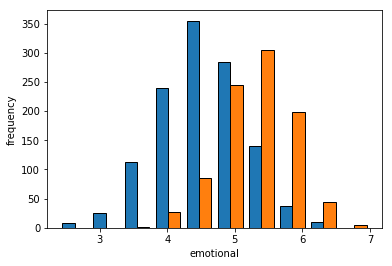

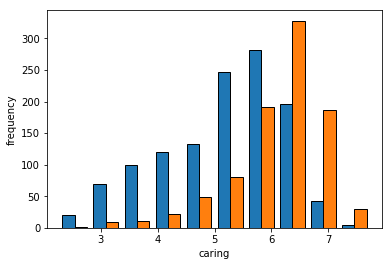

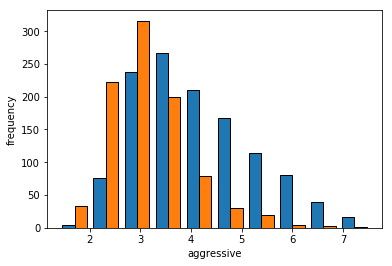

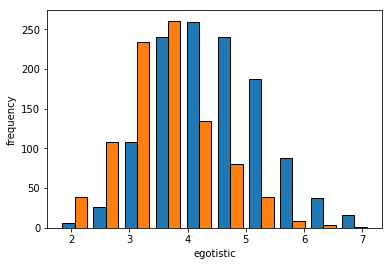

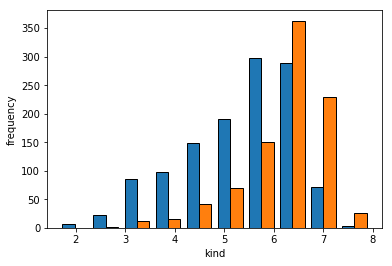

0.5774258612250409
1


In [4]:
for i in range(5):
    plt.hist([t_m[:,top5[i]], t_f[:,top5[i]]] ,edgecolor = 'black')
    plt.xlabel(name[top5[i]])
    plt.ylabel('frequency')
    plt.show()

m=np.sum(e_m)/len(e_m)
f=np.sum(e_f)/len(e_f)
print(min(m,f)/max(m,f))
print(np.argmin([m,f]))

In [5]:
s_1=np.sum(e1)/len(e1)
s_2=np.sum(e2)/len(e2)
s_3=np.sum(e3)/len(e3)

print(min([s_1,s_2,s_3])/max([s_1,s_2,s_3]))
print(np.argmin([s_1,s_2,s_3]))

0.6706168831168832
1
